In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import pandas
import pynumdiff
import scipy.fftpack
from IPython.display import display,SVG
import figurefirst
fifi = figurefirst

/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:526: Futu

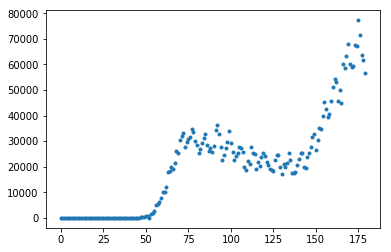

In [2]:
df = pandas.read_csv('covid_us_confirmed_072020.csv')

columns_to_drop = []
for col in df.columns:
    if '/' not in col:
        columns_to_drop.append(col)
        
df = df.drop(columns=columns_to_drop)
covid = np.diff( df.sum(axis=0).values )
plt.plot(covid, '.')

In [3]:
def get_gamma(dt, freq, timeseries_length=None):
    log_gamma = -5.1 + -1.59*np.log(freq) + -0.72*np.log(dt)
    return np.exp(log_gamma)

In [128]:
dt = 1 #60*60*24 # seconds
t = np.arange(0, (len(covid)+2)*dt, dt)[0:-2]

In [129]:
figure_layout = 'fig_7_covid.svg'
cutoff_freq = 1/(60*dt) # by week

In [130]:
t_weeks = np.arange(0, t[-1], dt*7)

In [131]:
len(t_weeks)

26

# Data

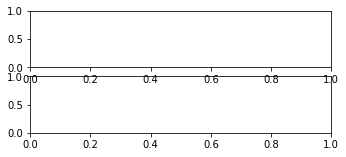

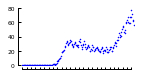

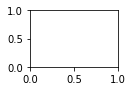

In [132]:
layout = fifi.svg_to_axes.FigureLayout(figure_layout, autogenlayers=True, 
                                           make_mplfigures=True, hide_layers=[])

ax = layout.axes[('data', 'data')]

ax.plot(t, covid, '.', color='blue', markersize=3, zorder=-10, markeredgecolor='none', markerfacecolor='blue')
ax.fill_between([60, 65], -4, 4, edgecolor='none', facecolor='cornflowerblue', alpha=0.2, zorder=-20)

ax.set_rasterization_zorder(0)
ax.set_xlim(0, t[-1])
ax.set_ylim(0, 80000)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [0, 20000, 40000, 60000, 80000],
                                 xticks = t_weeks,
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})

ax.set_yticklabels([0, 20, 40, 60, 80])
ax.set_xticklabels([])

fifi.mpl_functions.set_fontsize(ax, 6)

layout.append_figure_to_layer(layout.figures['data'], 'data', cleartarget=True)
layout.write_svg(figure_layout)

# Spectra

In [133]:
def plot_power_spectra(x, t, cutoff_freq=None, ax=None):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        
    ax.set_yscale('log')
    ax.set_xscale('log')
        
    yf = scipy.fftpack.fft(x)
    N = len(t)
    dt = np.mean(np.diff(t))
    xf = np.linspace(0.0, 1.0/(2.0*dt), N/2)
    
    P = 2.0/N * np.abs(yf[:N//2])
    ax.plot(xf, P, color='black', zorder=-10)
    
    if cutoff_freq is not None:
        ax.vlines(cutoff_freq, 1e-6, 1e10, color='red')

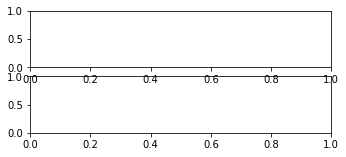

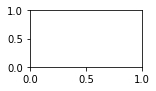

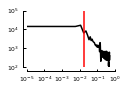

In [134]:
layout = fifi.svg_to_axes.FigureLayout(figure_layout, autogenlayers=True, 
                                           make_mplfigures=True, hide_layers=[])

ax = layout.axes[('spectra', 'spectra')]
plot_power_spectra(covid, t, cutoff_freq=cutoff_freq, ax=ax)

ax.set_ylim(1e2, 1e5)
#ax.set_xlim(1e-9, 1e-1)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 xticks=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0], 
                                 yticks=[1e2, 1e3, 1e4, 1e5],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})

fifi.mpl_functions.set_fontsize(ax, 6)


layout.append_figure_to_layer(layout.figures['spectra'], 'spectra', cleartarget=True)
layout.write_svg(figure_layout)

In [135]:
tvgamma = get_gamma(dt, cutoff_freq)
print(tvgamma)

4.0959875735573945


In [136]:
method = 'savgoldiff'
method_parent = 'linear_model'
params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](covid, dt, tvgamma=tvgamma)
x_smooth_savgol, xdot_smooth_savgol = pynumdiff.__dict__[method_parent].__dict__[method](covid, dt, params)

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

In [137]:
params

[10, 27, 21]

In [138]:
method = 'constant_acceleration'
method_parent = 'kalman_smooth'
params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](covid, dt, tvgamma=tvgamma)
x_smooth_kalman, xdot_smooth_kalman = pynumdiff.__dict__[method_parent].__dict__[method](covid, dt, params)

In [139]:
method = 'butterdiff'
method_parent = 'smooth_finite_difference'
params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](covid, dt, tvgamma=tvgamma)
x_smooth_butter, xdot_smooth_butter = pynumdiff.__dict__[method_parent].__dict__[method](covid, dt, params)

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

In [140]:
method = 'jerk'
method_parent = 'total_variation_regularization'
params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](covid, dt, tvgamma=tvgamma)
x_smooth_tvrj, xdot_smooth_tvrj = pynumdiff.__dict__[method_parent].__dict__[method](covid, dt, params)

In [141]:
colors = {'savgol': 'violet',
                           'butter': 'lightgreen',
                       'kalman': 'cornflowerblue',
                           'tvrj': 'lightsalmon'}

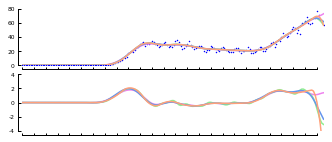

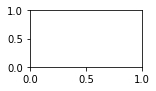

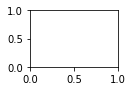

In [142]:
layout = fifi.svg_to_axes.FigureLayout(figure_layout, autogenlayers=True, 
                                           make_mplfigures=True, hide_layers=[])


ax = layout.axes[('smooth', 'pos')]

ax.plot(t, covid, '.', color='blue', markersize=3, zorder=-10, markeredgecolor='none', markerfacecolor='blue')
ax.set_rasterization_zorder(0)



ax.plot(t, x_smooth_savgol, color=colors['savgol'])
ax.plot(t, x_smooth_butter, color=colors['butter'])
ax.plot(t, x_smooth_kalman, color=colors['kalman'])
ax.plot(t, x_smooth_tvrj, color=colors['tvrj'])

ax.set_xlim(0, t[-1])
ax.set_ylim(0, 80000)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [0, 20000, 40000, 60000, 80000],
                                 xticks = t_weeks,
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})
ax.set_yticklabels([0, 20, 40, 60, 80])
ax.set_xticklabels([])

ax = layout.axes[('smooth', 'vel')]

ax.plot(t, xdot_smooth_savgol, color=colors['savgol'])
ax.plot(t, xdot_smooth_butter, color=colors['butter'])
ax.plot(t, xdot_smooth_kalman, color=colors['kalman'])
ax.plot(t, xdot_smooth_tvrj, color=colors['tvrj'])
#ax.fill_between([20,30], -15, 15, edgecolor='none', facecolor='gray', alpha=0.2, zorder=-20)





ax.set_xlim(0, t[-1])
ax.set_ylim(-4000, 4000)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [-4000, -2000, 0, 2000, 4000],
                                 xticks = t_weeks,
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})
ax.set_yticklabels([-4,-2,0,2,4])
ax.set_xticklabels([])

fifi.mpl_functions.set_fontsize(ax, 6)

layout.append_figure_to_layer(layout.figures['smooth'], 'smooth', cleartarget=True)
layout.write_svg(figure_layout)